# Unsupervised Approach

In this part of the project, neural networks are created without labeled data. 

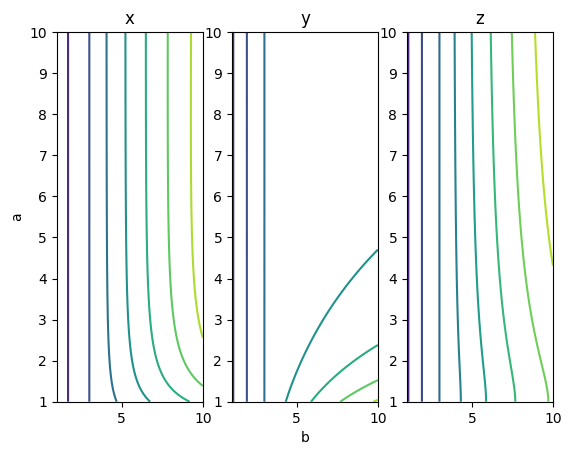

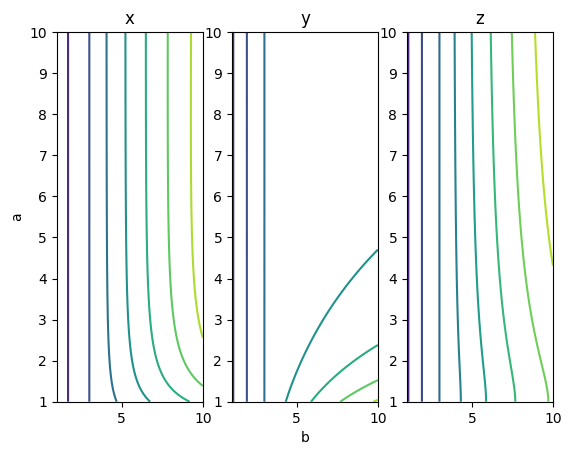

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1058 - accuracy: 0.0000e+00 - val_loss: 0.0890 - val_accuracy: 0.0000e+00
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0815 - accuracy: 0.0000e+00 - val_loss: 0.0731 - val_accuracy: 0.0000e+00
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0675 - accuracy: 0.0000e+00 - val_loss: 0.0608 - val_accuracy: 0.0000e+00
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0564 - accuracy: 0.0000e+00 - val_loss: 0.0507 - val_accuracy: 0.0000e+00
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0470 - accuracy: 0.0000e+00 - val_loss: 0.0422 - val_accuracy: 0.0000e+00
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0389 - accuracy: 4.4444e-05 - val_loss: 0.0346 - val_accuracy: 0.0000e+00
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0319 - accuracy: 

Epoch 55/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 56/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 57/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 58/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 59/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 60/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 61/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0059 - acc

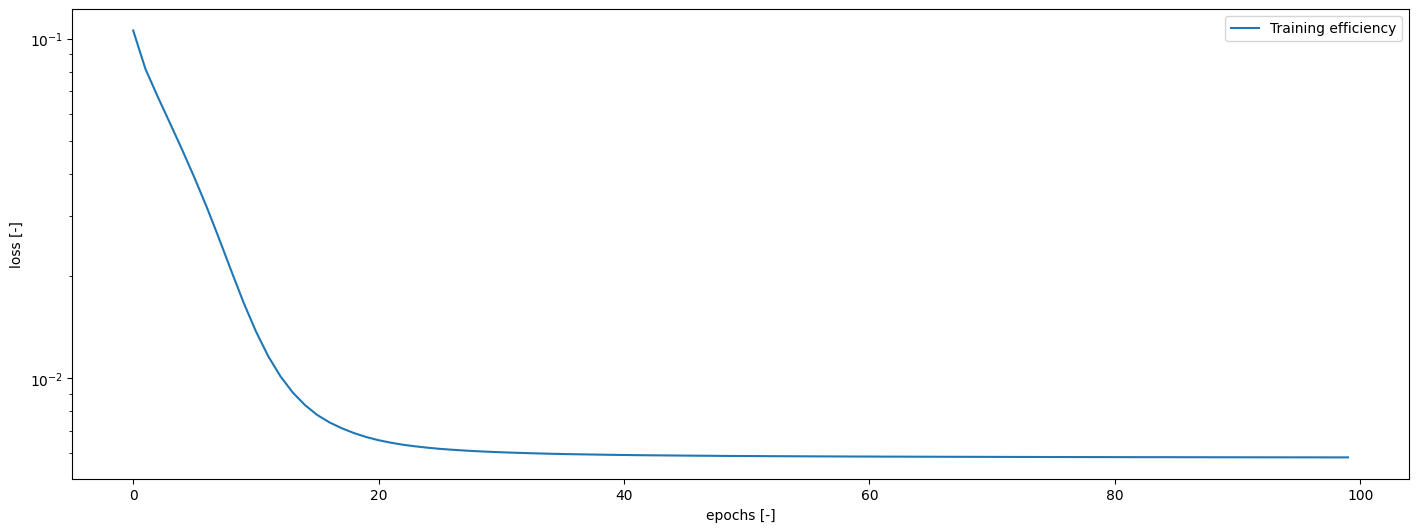

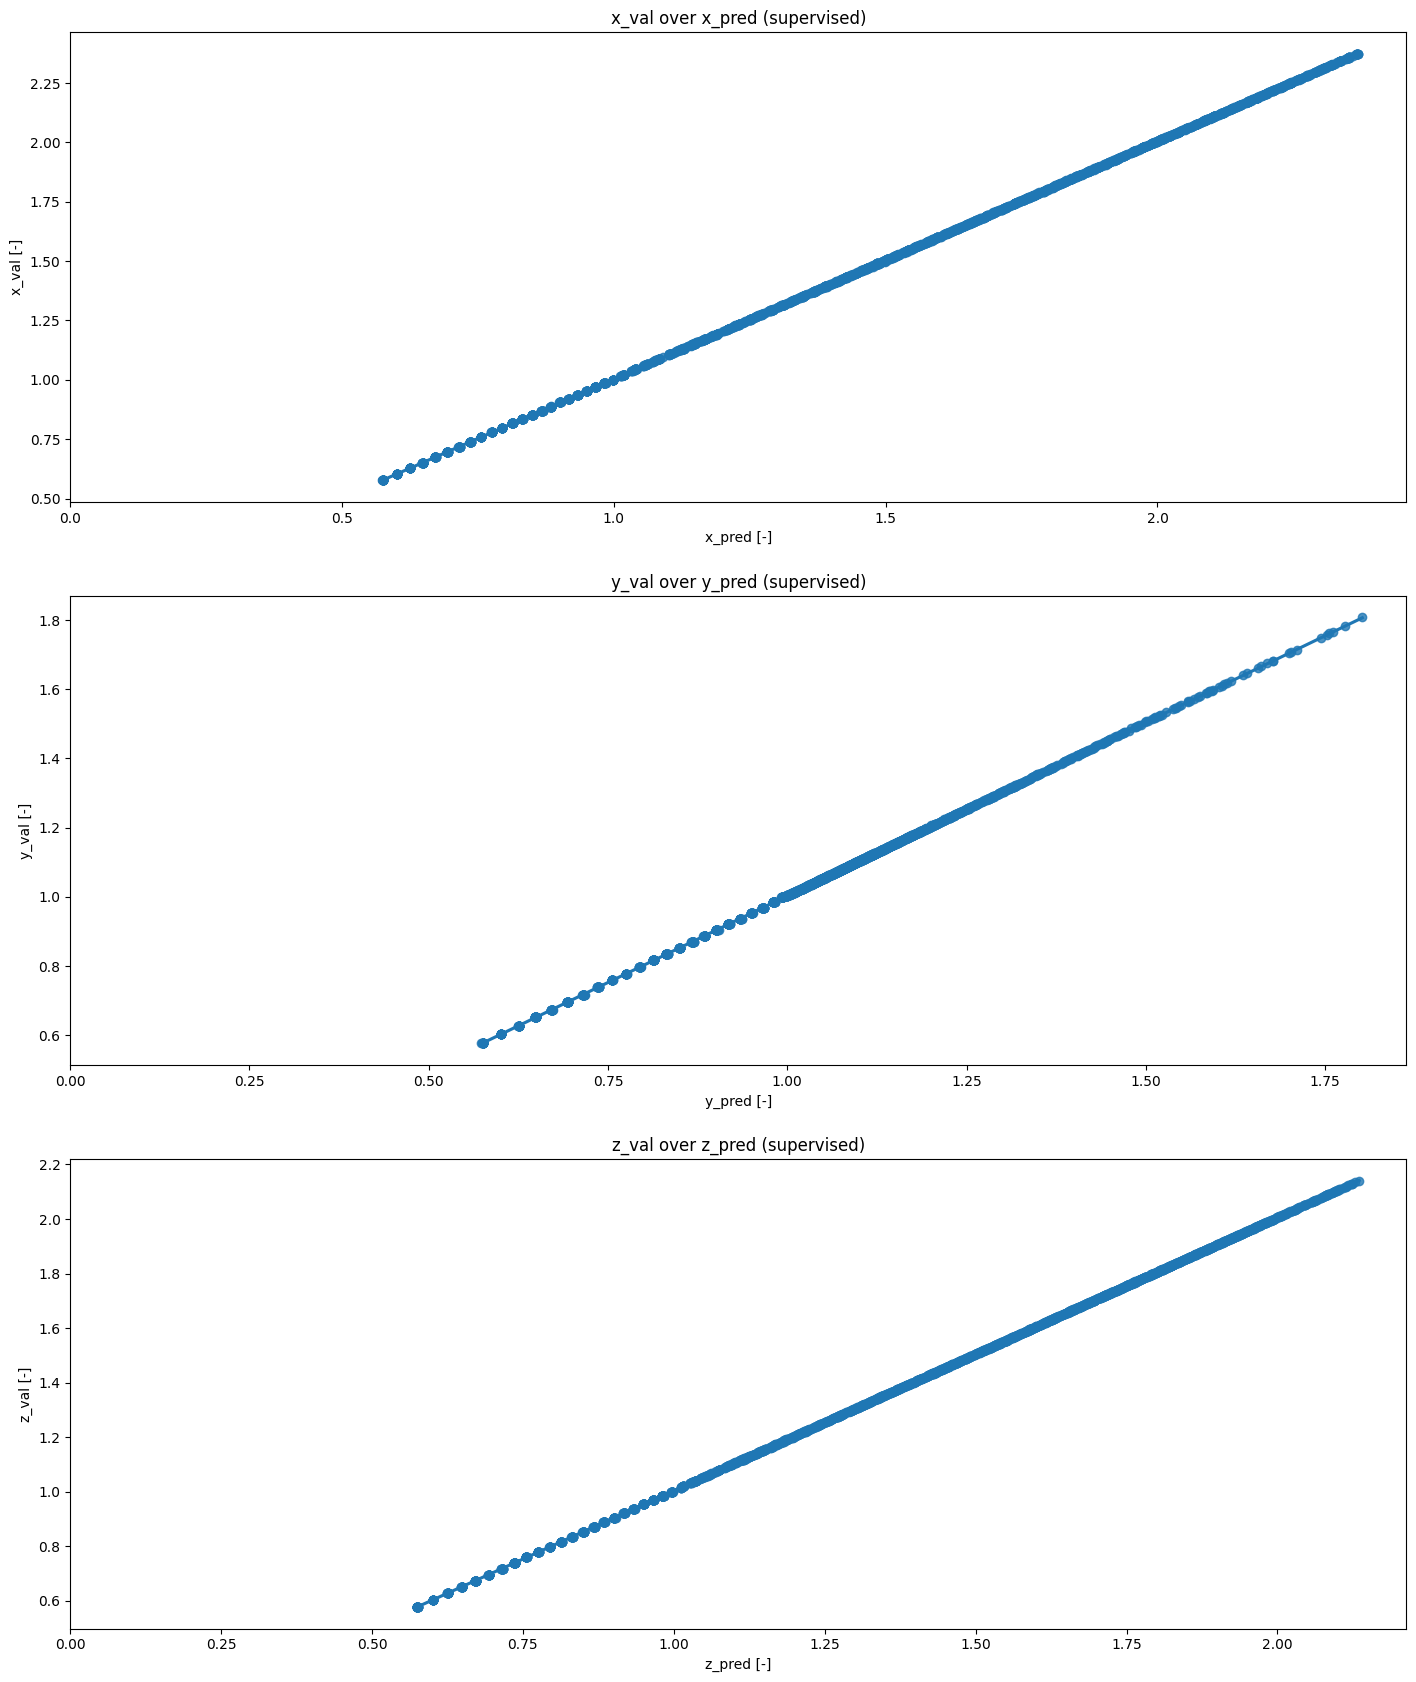

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sb
import time
import random
%run Data.ipynb import ab
%run Supervised_App.ipynb import xyz_pred_sup, ab_train, ab_valid, xyz_valid

start = time.process_time()

To implement unsupervised method, a new loss function must be defined.

In [2]:
def penalty_function(xyz, ab):
    result = 1/(xyz[:,0]*xyz[:,1]*xyz[:,2]) + 1*tf.nn.relu(xyz[:,0]*xyz[:,1] + xyz[:,1]*xyz[:,2] + xyz[:,0]*xyz[:,2] -ab[:,0])**3 + tf.nn.relu(xyz[:,1]**ab[:,1] -xyz[:,0])**3
    return result

Define the model. Overfitting is not required, so no need for regularizer.

In [3]:
model = keras.Sequential(name='unsupervised_NN')
model.add(keras.layers.Input(shape = (ab.shape[1],), name='input_layer'))
model.add(keras.layers.Dense(units=900, activation='relu', name='1st_hidden'))
model.add(keras.layers.Dense(units=500, activation='relu', name='2nd_hidden'))
model.add(keras.layers.Dense(units=3, activation ='exponential', name='output'))

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss=[penalty_function], metrics = [keras.metrics.Accuracy()])

model.summary()

Model: "unsupervised_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 900)               2700      
                                                                 
 2nd_hidden (Dense)          (None, 500)               450500    
                                                                 
 output (Dense)              (None, 3)                 1503      
                                                                 
Total params: 454,703
Trainable params: 454,703
Non-trainable params: 0
_________________________________________________________________


Train the model with custom procedure.

In [6]:
train_loss_results = []

num_epochs = 10


def loss(model,ab):
    xyz_pred = model(ab)
    return penalty_function(xyz_pred,ab)

def grad(model,ab,xyz):
    with tf.GradientTape() as tape:
        loss_value = loss(model,ab)
    return loss_value, tape.gradient(loss_value,model.trainable_variables)

@tf.function
def train_step(ab, xyz_pred_uns):
    loss_value,grads = grad(model,ab_train,xyz_pred_uns)
    opt.apply_gradients(zip(grads, model.trainable_variables))
    return loss_value

def chunks(lst,n):
    chunked_lst = []
    for i in range(0, len(lst),n):
        chunked_lst.append(lst[i:i+n])
    return chunked_lst

ab_train_chunks = chunks(ab_train,50)
before_train = time.process_time()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

for epoch in range(num_epochs):
    epoch_start = time.process_time()
    epoch_loss_avg = tf.keras.metrics.Mean()
    rand_chunk = random.randint(0, len(ab_train_chunks)-1)
    for ab in ab_train_chunks[rand_chunk]:
        ab = ab.reshape(1,2)
        xyz_pred_uns = model(ab)
        loss_value = train_step(ab,xyz_pred_uns)
        epoch_loss_avg.update_state(loss_value)
        
    train_loss_results.append(epoch_loss_avg.result())   
    print('Epoch {}: loss: {}'.format(epoch+1,epoch_loss_avg.result()))
    
train_time = time.process_time() - before_train
print('{:.2f}s for training'.format(train_time))
print('average of {:.2f}s per epoch'.format(train_time/num_epochs))


Epoch 1: loss: 0.9733899831771851
Epoch 2: loss: 0.7770894169807434
Epoch 3: loss: 0.7410488128662109
Epoch 4: loss: 0.7183524370193481
Epoch 5: loss: 0.7010629773139954
Epoch 6: loss: 0.6891109943389893
Epoch 7: loss: 0.6811253428459167
Epoch 8: loss: 0.6753145456314087
Epoch 9: loss: 0.6707924604415894
Epoch 10: loss: 0.6672105193138123
88.64s for training
average of 8.86s per epoch


Use validation dataset to predict results.

In [7]:
xyz_pred_uns = model.predict(ab_valid)

# Model save
#model.save('model_UA')

79/79 [==============================] - 0s 1ms/step


Visualize the training efficiency.

Text(0, 0.5, 'loss [-]')

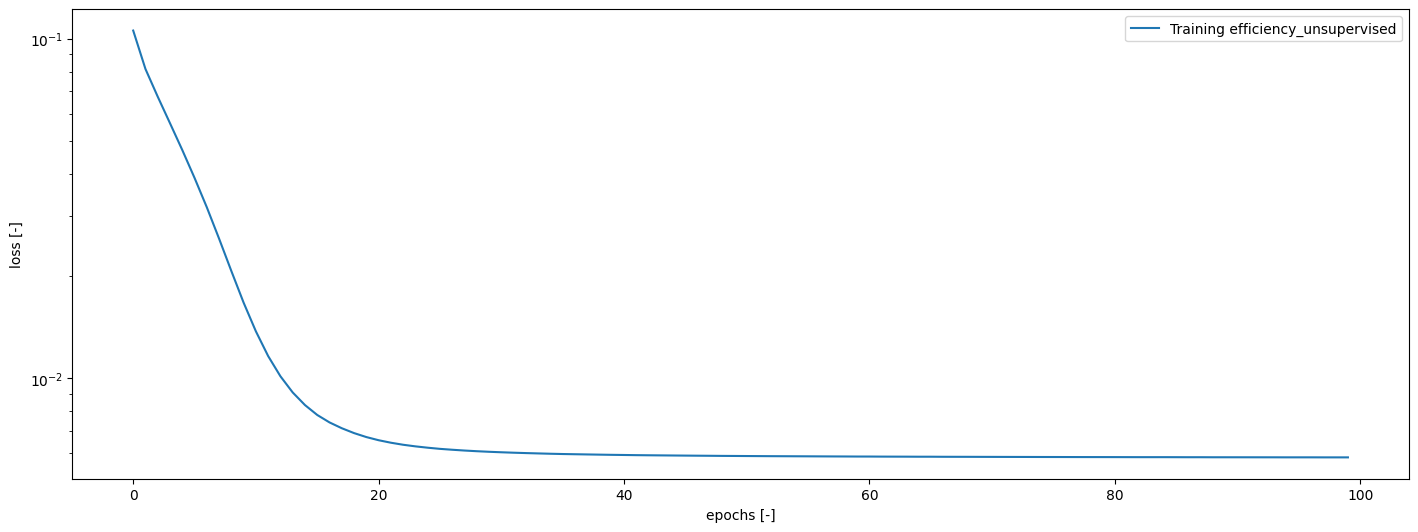

In [8]:
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(100)

ax1 = plt.subplot2grid(shape=(7,5), loc=(0,0),colspan=1)
ax1.semilogy(history.history['loss'], label='Training efficiency_unsupervised')
ax1.legend()
ax1.set_xlabel('epochs [-]')
ax1.set_ylabel('loss [-]')

Plot the results from combined methods.

[Text(0.5, 0, 'z_pred [-]'),
 Text(0, 0.5, 'z_val [-]'),
 (0.0, 2.2879231214523315),
 Text(0.5, 1.0, 'z_val over z_pred')]

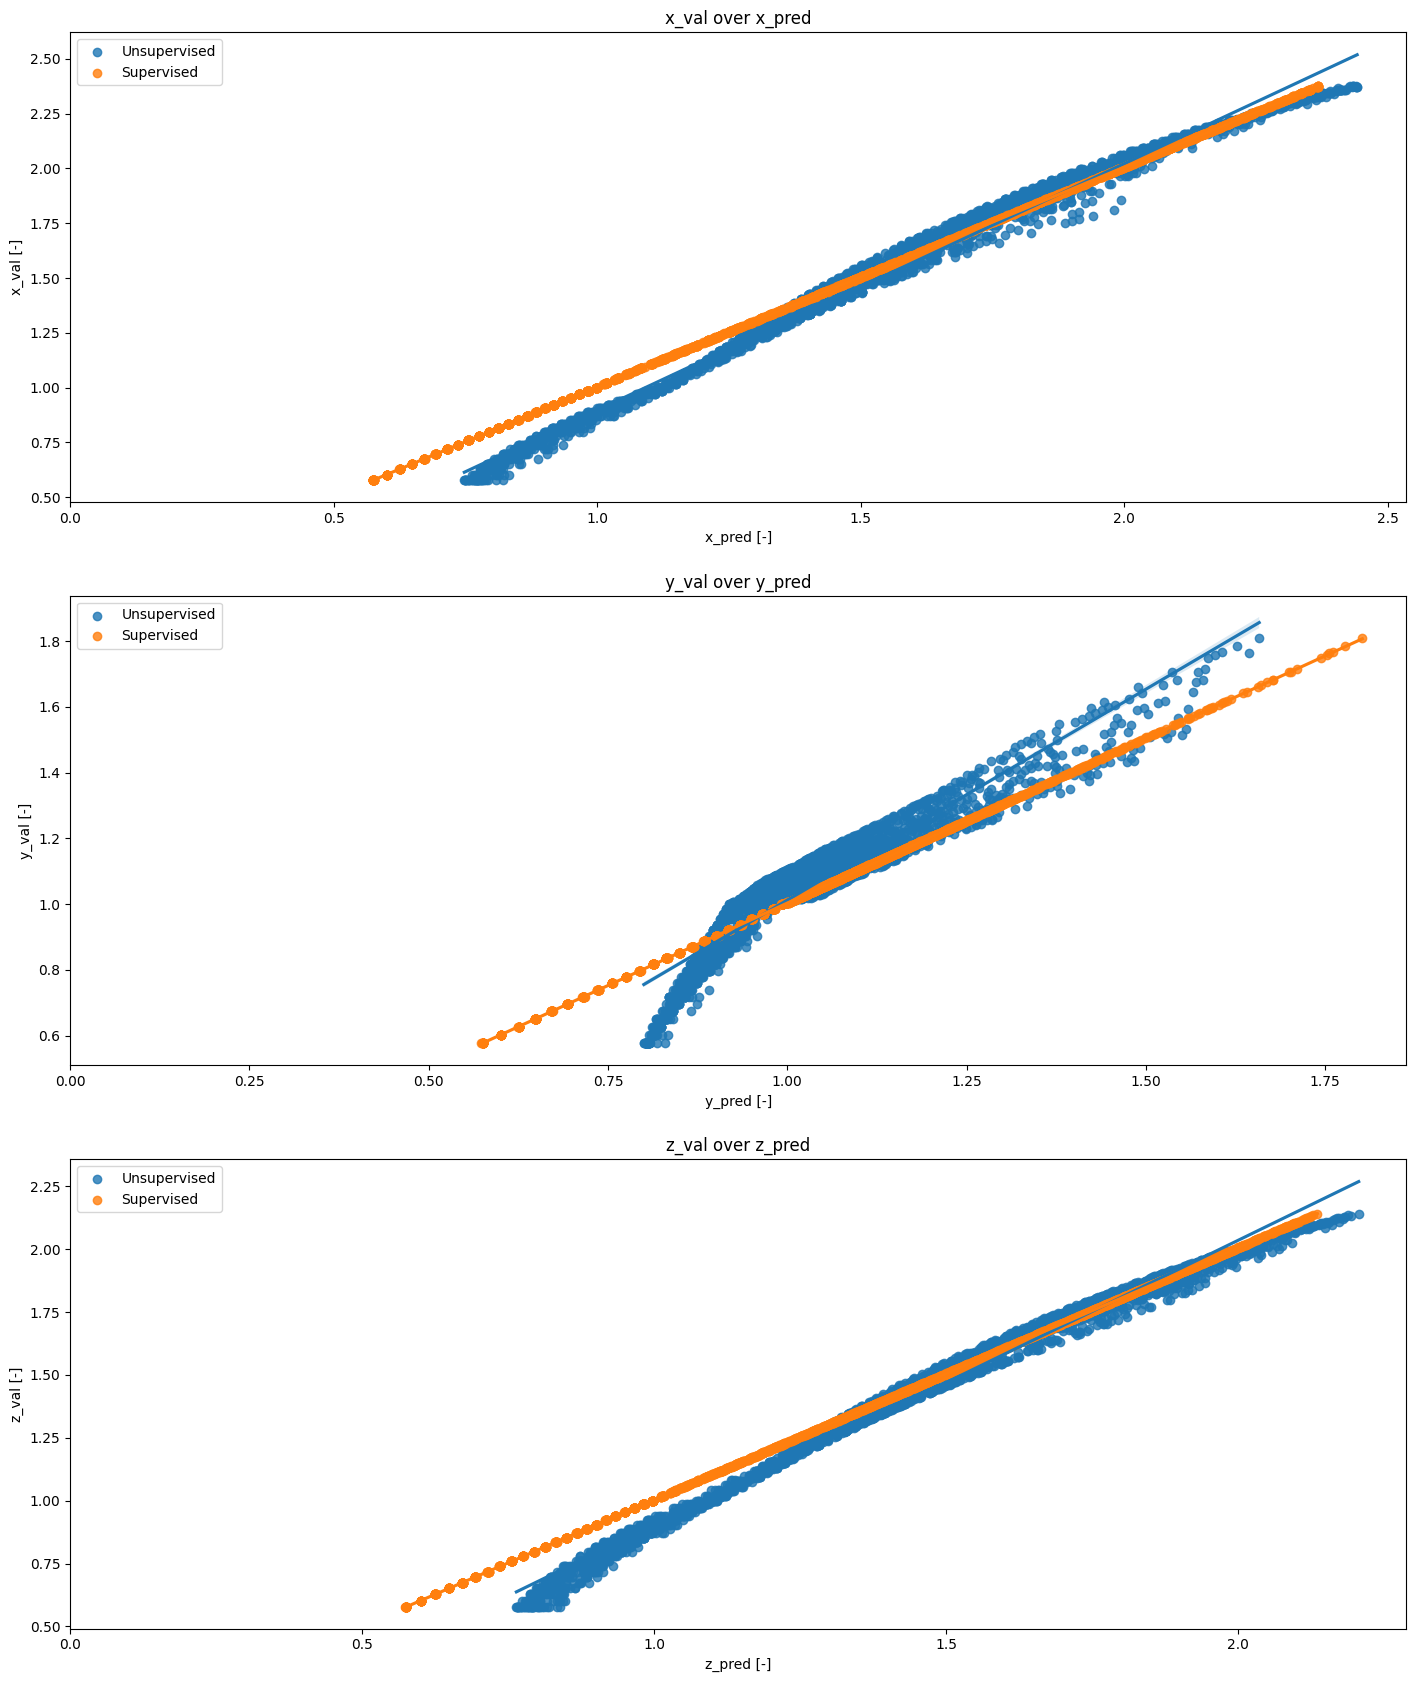

In [9]:
fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(100)

ax1 = plt.subplot2grid(shape=(7,5), loc=(0,0), colspan=1)
ax1 = sb.regplot(x = xyz_pred_uns[:,0], y = xyz_valid[:,0], label='Unsupervised')
ax1 = sb.regplot(x = xyz_pred_sup[:,0], y = xyz_valid[:,0], label='Supervised')
ax1.legend()
ax1.set(xlabel='x_pred [-]', ylabel='x_val [-]', xlim=(0), title = 'x_val over x_pred')

ax2 = plt.subplot2grid(shape=(7,5), loc=(1,0), colspan=1)
ax2 = sb.regplot(x = xyz_pred_uns[:,1], y = xyz_valid[:,1], label='Unsupervised')
ax2 = sb.regplot(x = xyz_pred_sup[:,1], y = xyz_valid[:,1], label='Supervised')
ax2.legend()
ax2.set(xlabel='y_pred [-]', ylabel='y_val [-]', xlim=(0), title = 'y_val over y_pred')

ax3 = plt.subplot2grid(shape=(7,5), loc=(2,0), colspan=1)
ax3 = sb.regplot(x = xyz_pred_uns[:,2], y = xyz_valid[:,2], label='Unsupervised')
ax3 = sb.regplot(x = xyz_pred_sup[:,2], y = xyz_valid[:,2], label='Supervised')
ax3.legend()
ax3.set(xlabel='z_pred [-]', ylabel='z_val [-]', xlim=(0), title = 'z_val over z_pred')
